In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"



# load the data

In [2]:
X_train_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/X_train_1.npy')/255
X_test_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/X_test_1.npy')/255
Y_train_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/Y_train_1.npy')
Y_test_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/Y_test_1.npy')

# inception


In [3]:
import tensorflow.keras.backend as K



def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [4]:
EPOCHS = 100
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224,224))
image_size = 0
#directory_root = '/kaggle/input/vegnet-organized-dataset-of-cauliflower-disease'
width=224
height=224
depth=3
n_classes=15

In [5]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [6]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
# model = tf.keras.backend.clear_session()


# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape= (224,224,3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m]) 

c:\Users\haile\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
#conda install 'h5py==2.10.0'

In [8]:
# train the network
print("[INFO] training INCEPTION network...")
history = model.fit(
    aug.flow(X_train_1, Y_train_1, batch_size=BS),
    validation_data=(X_test_1, Y_test_1),
    steps_per_epoch=len(X_train_1) // BS,
    epochs=1
    )

[INFO] training INCEPTION network...
73/73 [==============================] - 105s 1s/step - loss: 0.1987 - accuracy: 0.4122 - f1_m: 0.2936 - precision_m: 0.6153 - recall_m: 0.2099 - val_loss: 0.1537 - val_accuracy: 0.5178 - val_f1_m: 0.4880 - val_precision_m: 0.6489 - val_recall_m: 0.3946


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os

def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)
    
    epochs = np.arange(1, len(training) + 1)
    
    plt.plot(epochs, training, 'bo-', label='Train')
    plt.plot(epochs, validation, 'ro-', label='Val')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    
    filename = 'inception_{}.png'.format(yaxis)
    plt.savefig(filename)
    print('Figure saved as {}'.format(os.path.abspath(filename)))
    
    plt.show()



Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\matplotlib_fig_accuracy.png


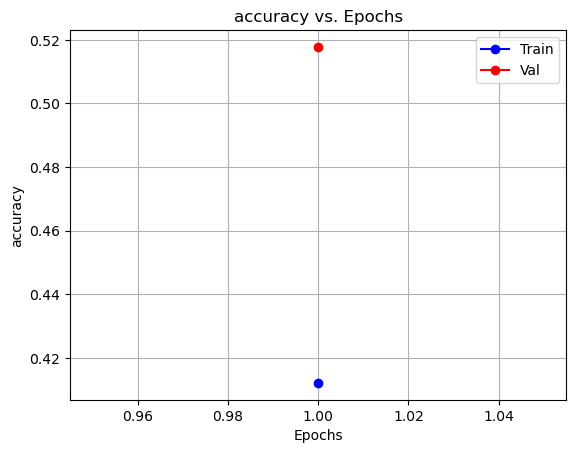

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\matplotlib_fig_loss.png


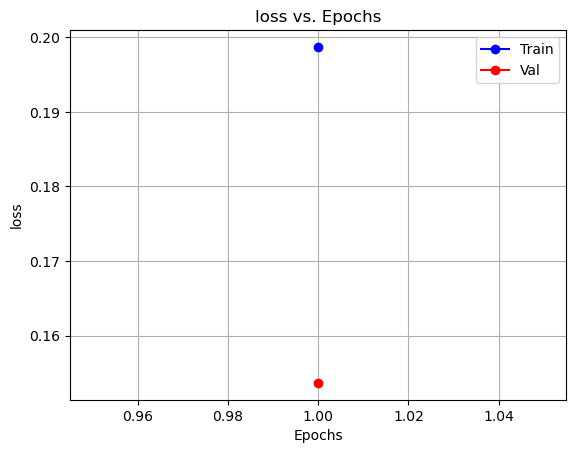

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\matplotlib_fig_precision.png


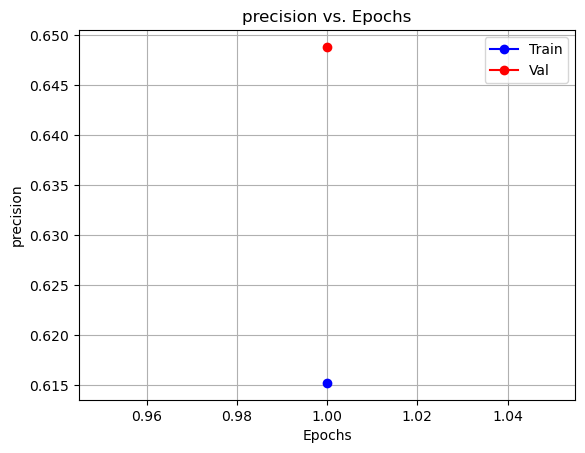

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\matplotlib_fig_recall.png


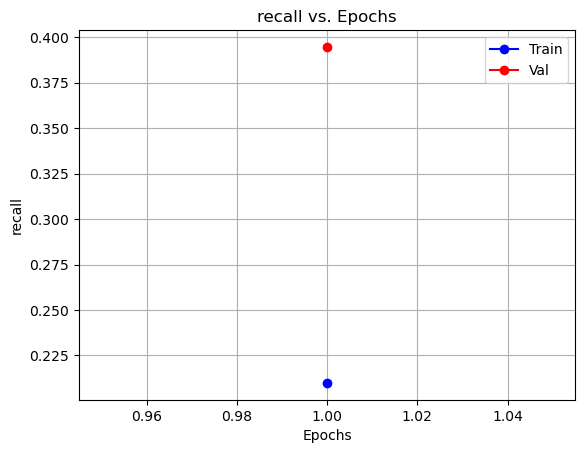

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\matplotlib_fig_f1 score.png


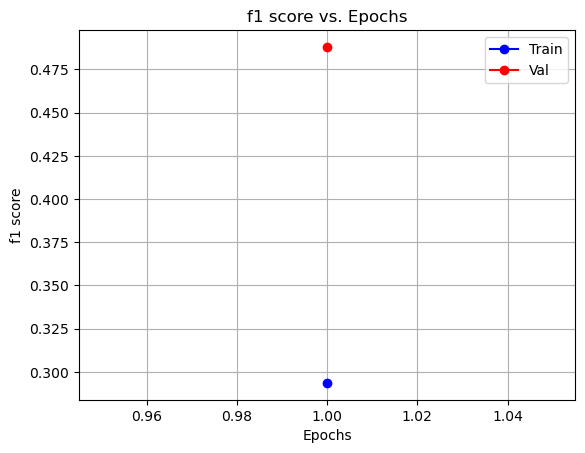

In [10]:

display_training_curves(
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss')
display_training_curves(
    history.history['precision_m'], 
    history.history['val_precision_m'], 
    'precision')
display_training_curves(
    history.history['recall_m'], 
    history.history['val_recall_m'], 
    'recall')
display_training_curves(
    history.history['f1_m'], 
    history.history['val_f1_m'], 
    'f1 score')

In [ ]:
def Res_Plot_Test_Save(name):
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(X_test_1, Y_test_1)
    print(f"Test Accuracy: {scores[1]*100}")
    print("[INFO] Saving model")
    model.save(name)

In [ ]:
Res_Plot_Test_Save('Inception_ModelV3_(Imagenet_Weights).h5')

In [ ]:
# conda install -c conda-forge nbformat

# paralell cufft

In [ ]:
import tensorflow as tf
#import pycuda.autoinit
import pycuda.gpuarray as gpuarray
import skcuda.fft as cu_fft

def conv2d_cuda_fft(inputs, filters):
    # 将输入和卷积核转换为GPU上的数组
    inputs_gpu = gpuarray.to_gpu(inputs.numpy().astype(np.float32))
    filters_gpu = gpuarray.to_gpu(filters.numpy().astype(np.float32))

    # 将输入和卷积核变形为2D张量
    batch_size, in_height, in_width, in_channels = inputs.shape
    kernel_size, _, _, out_channels = filters.shape
    inputs_2d = inputs_gpu.transpose(0, 3, 1, 2).reshape(batch_size * in_channels, in_height * in_width)
    filters_2d = filters_gpu.transpose(2, 3, 1, 0).reshape(kernel_size * kernel_size * in_channels, out_channels)

    # 使用cuFFT计算输入和卷积核的FFT
    cu_fft.init()
    inputs_fft = cu_fft.fft(inputs_2d)
    filters_fft = cu_fft.fft(filters_2d)
    output_fft = tf.multiply(inputs_fft, filters_fft)

    # 使用cuFFT计算输出的IFFT
    output_2d = tf.real(cu_fft.ifft(output_fft))
    output_4d = tf.reshape(output_2d, (batch_size, in_height, in_width, out_channels))

    return output_4d

# VGG16 Model

In [12]:
import tensorflow as tf
from keras.models import Model
from keras.applications import vgg16
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
model = tf.keras.backend.clear_session()
# Get the Resnet model so we can do transfer learning
base_model = vgg16.VGG16(weights= None, include_top=False, input_shape= (224,224,3))
# model= None                          
# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m]) 
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

# train the network

In [13]:
print("[INFO] training VGG16 network...")
history = model.fit(
    aug.flow(X_train_1, Y_train_1, batch_size=BS),
    validation_data=(X_test_1, Y_test_1),
    steps_per_epoch=len(X_train_1) // BS,
    epochs=1
    )

[INFO] training VGG16 network...
Epoch 1/1
24/73 [========>.....................] - ETA: 11:00 - loss: 0.2450 - accuracy: 0.9333 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

KeyboardInterrupt: 

# display curves

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)
    
    epochs = np.arange(1, len(training) + 1)
    
    plt.plot(epochs, training, 'bo-', label='Train')
    plt.plot(epochs, validation, 'ro-', label='Val')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    
    filename = 'vgg_{}.png'.format(yaxis)
    plt.savefig(filename)
    print('Figure saved as {}'.format(os.path.abspath(filename)))
    
    plt.show()



In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

display_training_curves(
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss')
display_training_curves(
    history.history['precision_m'], 
    history.history['val_precision_m'], 
    'precision')
display_training_curves(
    history.history['recall_m'], 
    history.history['val_recall_m'], 
    'recall')
display_training_curves(
    history.history['f1_m'], 
    history.history['val_f1_m'], 
    'f1 score')

NameError: name 'history' is not defined

In [ ]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_1, Y_test_1, verbose=0)
print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

# save model


In [ ]:
Res_Plot_Test_Save('VGG16_(Imagenet_Weights).h5')